### This is my first kernel
### Tried to do some EDA and Visualization

In [113]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings

import plotly.offline as py 
import plotly.graph_objs as go
from plotly import tools
py.init_notebook_mode(connected=True)

warnings.filterwarnings("ignore")
%matplotlib inline

import os
print(os.listdir("../input"))


['StudentsPerformance.csv']


In [114]:
sp = pd.read_csv('../input/StudentsPerformance.csv')
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [115]:
sp.shape

(1000, 8)

In [116]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Lets Look for any null values

In [117]:
sp.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Lets calculate percentage

In [118]:
sp['Percentage'] = sp['math score'] + sp['reading score'] + sp['writing score']
sp['Percentage'] = sp['Percentage'] / 3

In [119]:
sp.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage
688,male,group A,high school,free/reduced,none,53,58,44,51.666667
532,male,group E,associate's degree,standard,completed,62,61,58,60.333333
213,male,group C,associate's degree,free/reduced,completed,60,51,56,55.666667
152,female,group B,associate's degree,standard,completed,59,70,66,65.000000
579,female,group D,master's degree,standard,none,53,61,68,60.666667
356,male,group A,associate's degree,standard,none,63,61,61,61.666667
141,female,group C,some college,free/reduced,none,59,62,64,61.666667
185,male,group C,associate's degree,free/reduced,completed,65,67,65,65.666667
398,male,group B,some high school,standard,none,74,63,57,64.666667
146,male,group B,some high school,standard,none,88,84,75,82.333333


In [120]:
sp.describe()

,math score,reading score,writing score,Percentage
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


### Lets get the results
* if a student fails in any of one subject it is considered as fail

In [121]:
sp.loc[(sp["math score"] < 35) | (sp["reading score"] < 35) |  (sp["writing score"] < 35) , "Result"] = "F"
sp.loc[(sp["math score"] >= 35) & (sp["reading score"] >= 35) &  (sp["writing score"] >= 35) , "Result"] = "P"

sp["Result"].value_counts()

P    971
F     29
Name: Result, dtype: int64

In [122]:
def pie_plot(cnt, colors, text):
    labels = list(cnt.index)
    values = list(cnt.values)
    
    trace = go.Pie(labels=labels, 
                   values=values, 
                   hoverinfo='value+percent', 
                   title=text, 
                   textinfo='label', 
                   hole=.4, 
                   textposition='inside', 
                   marker=dict(colors = colors,
                              ),
                  )
    return trace


results = sp["Result"].value_counts()
trace = pie_plot(results, ['#09efef', '#b70333'], "Results")

py.iplot([trace], filename='results')

### Different features that affect Pass Percentage

In [123]:
def horizontal_bar_chart(cnt_srs, color):
    trace = go.Bar(
        y = cnt_srs.index,
        x = cnt_srs.values,
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

cnt_srs = sp['lunch'][sp['Result'] == 'P'].value_counts()
trace_1 = horizontal_bar_chart(cnt_srs, 'rgba(15, 255, 199, 0.6)')

cnt_srs = cnt_srs = sp['gender'][sp['Result'] == 'P'].value_counts()
trace_2 = horizontal_bar_chart(cnt_srs, 'rgba(255, 15, 247, 0.6)')

cnt_srs = cnt_srs = sp['race/ethnicity'][sp['Result'] == 'P'].value_counts()
trace_3 = horizontal_bar_chart(cnt_srs, 'rgba(229, 21, 2, 0.6)')

cnt_srs = sp['parental level of education'][sp['Result'] == 'P'].value_counts()
trace_4 = horizontal_bar_chart(cnt_srs, 'rgba(242, 255, 0, 0.6)')

cnt_srs = sp['test preparation course'][sp['Result'] == 'P'].value_counts()
trace_5 = horizontal_bar_chart(cnt_srs, 'rgba(55, 255, 20, 0.6)')


fig = tools.make_subplots(rows=3, cols=2, vertical_spacing=0.04, subplot_titles=["Lunch on Result", "Gender on Result", "Race on Result", 
                                                                                 "Parentaledu on Result", "Courseprep on Result"])

fig.append_trace(trace_1, 1, 1)
fig.append_trace(trace_2, 1, 2)
fig.append_trace(trace_3, 2, 1)
fig.append_trace(trace_4, 2, 2)
fig.append_trace(trace_5, 3, 1)

fig['layout'].update(height=1200, width=1250, paper_bgcolor='rgba(186, 191, 244, 0.6)', title="Effect on Result")

py.iplot(fig, filename='effect')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5 ]  [ (3,2) x6,y6 ]



### Observations:-
* Standard Lunch students are performing well
* Group C and Group D students are performing well
* Parental Education cannot be interpreted here as master degree parents would be less so it is showing less passing students 

In [142]:
sp["parental level of education"].value_counts()
#sp['parental level of education'][sp["Result"] == 'P'].count()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [141]:
edu = sp['parental level of education'][sp['Result'] == 'P'].value_counts()

edu["associate's degree"] = (edu["associate's degree"]/971)*100
edu["some college"] = (edu["some college"]/971)*100
edu["high school"] = (edu["high school"]/971)*100
edu["some high school"] = (edu["some high school"]/971)*100
edu["bachelor's degree"] = (edu["bachelor's degree"]/971)*100
edu["master's degree"] = (edu["master's degree"]/971)*100

trace = pie_plot(edu, ['rgba(15, 255, 199, 0.6)', 
                       'rgba(255, 15, 247, 0.6)', 
                       'rgba(229, 21, 2, 0.6)', 
                       'rgba(242, 255, 0, 0.6)', 
                       'rgba(55, 255, 20, 0.6)', 
                       'rgba(60, 30, 200, 0.6)'], 
                       "Grades")

py.iplot([trace], filename="Grades")

* Here we can see parental education is also important feature

### Lets calculate the grades A,B,C,D,E,F

In [124]:
def Grading(x, y):
    if y == 'F':
        return 'F'
    if x >= 80:
        return 'A'
    if x >= 70:
        return 'B'
    if x >= 60:
        return 'C'
    if x >= 50:
        return 'D'
    if x >= 35:
        return 'E'
    else:
        return 'F'
    
sp['Grade'] = sp.apply(lambda x : Grading(x['Percentage'], x['Result']), axis=1)

In [125]:
#For annotations
def annot(ax, h):
    for p in ax.patches:
        plt.text(p.get_x()+0.4*p.get_width(), h+p.get_height(), "{:1.0f}".format(p.get_height()), ha="center", va="center")

### Lets explore each feature with grades

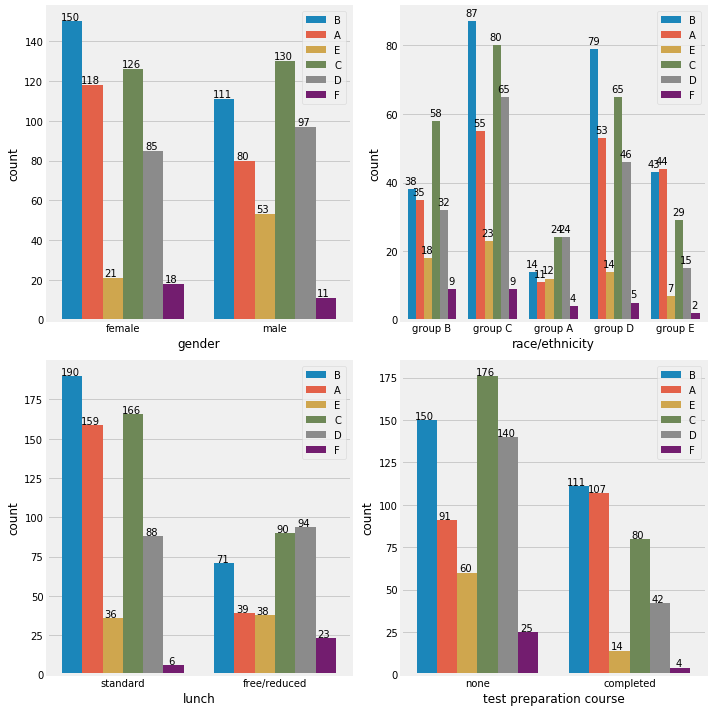

In [135]:
columns = ["gender", "race/ethnicity", "lunch", "test preparation course"]

plt.figure(figsize=(10,10))
subplot = 1
for col in columns:
    plt.subplot(2,2,subplot)
    ax = sns.countplot(x=col, hue="Grade", data=sp)
    annot(ax, 2.3)
    subplot += 1
    plt.legend(loc="upper right")
plt.tight_layout()

In [127]:
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,Result,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,P,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,P,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,P,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,P,E
4,male,group C,some college,standard,none,76,78,75,76.333333,P,B


In [128]:
grades = sp["Grade"].value_counts()

trace = pie_plot(grades, ['rgba(15, 255, 199, 0.6)', 
                          'rgba(255, 15, 247, 0.6)', 
                          'rgba(229, 21, 2, 0.6)', 
                          'rgba(242, 255, 0, 0.6)', 
                          'rgba(55, 255, 20, 0.6)', 
                          'rgba(60, 30, 200, 0.6)'], 
                          "Grades")

py.iplot([trace], filename="Grades")

### Who has cleared the exam mostly Male or Female?

In [145]:
sp["gender"].value_counts()
#sp["gender"][sp["Result"] == "P"].count()

female    518
male      482
Name: gender, dtype: int64

In [146]:
gender_wise = sp["gender"][sp["Result"] == "P"].value_counts()

gender_wise["female"] = (gender_wise["female"]/971)*100
gender_wise["male"] = (gender_wise["male"]/971)*100

trace = pie_plot(gender_wise, 
                ["#ffa8a8", "#ff0202"], 
                "Gender Pass(%)")

py.iplot([trace], filename='gender_pass_%')

* Females lead with tiny margin

### Who are most top-scorers Males or Females?

In [131]:
top_scores = sp.sort_values(by="Percentage", ascending=False)[["gender", "Percentage"]].head(10)
top_scores["gender"].value_counts()

female    7
male      3
Name: gender, dtype: int64

(90, 100)

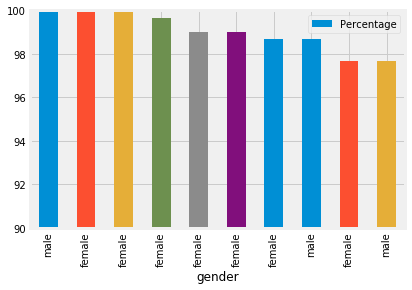

In [132]:
top_scores.plot(x="gender", y="Percentage", kind="bar")
plt.ylim([90,100])

* Females lead with big margin

### lets look at some low scoring students

In [133]:
low_scores = sp.sort_values(by="Percentage").head(10)
low_scores

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,Result,Grade
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000,F,F
980,female,group B,high school,free/reduced,none,8,24,23,18.333333,F,F
596,male,group B,high school,free/reduced,none,30,24,15,23.000000,F,F
327,male,group A,some college,free/reduced,none,28,23,19,23.333333,F,F
76,male,group E,some high school,standard,none,30,26,22,26.000000,F,F
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000,F,F
601,female,group C,high school,standard,none,29,29,30,29.333333,F,F
787,female,group B,some college,standard,none,19,38,32,29.666667,F,F
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667,F,F
211,male,group C,some college,free/reduced,none,35,28,27,30.000000,F,F


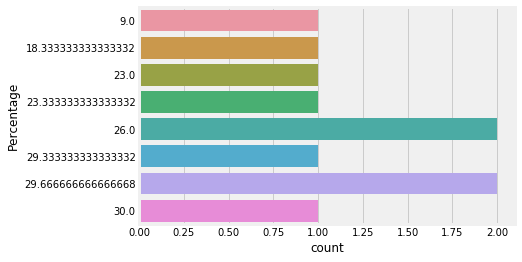

In [134]:
sns.countplot(y="Percentage", data=low_scores)

### Conclusions
* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course